<a href="https://colab.research.google.com/github/yoheshkannan/ML/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fashion MNIST Classification 

Fashion mnist is a dataset of Zalando's article images. Each image is a 28 x 28 grayscale image associated with a label from  10 classes.

1) Data Importing and Preprocesssing

In [1]:
# Import necessary Libraries
import keras
import matplotlib.pyplot as plt
import cv2
from keras.datasets import fashion_mnist

In [2]:
# Load the dataset
(train_X, y_train), (test_X, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# Summarize loaded dataset
print('Train: X=%s, y=%s'%(train_X.shape, y_train.shape))
print('Test: X=%s, y=%s'%(test_X.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [4]:
# Description about labels
"""
0 - T-shirt/top
1 - Trouser
2 - Pullover
3 - Dress
4 - Coat
5 - Sandal
6 - Shirt
7 - Sneaker
8 - Bag
9 - Ankle boot
"""

'\n0 - T-shirt/top\n1 - Trouser\n2 - Pullover\n3 - Dress\n4 - Coat\n5 - Sandal\n6 - Shirt\n7 - Sneaker\n8 - Bag\n9 - Ankle boot\n'

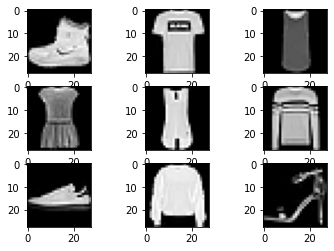

In [5]:
# Plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [6]:
# Display labels of that respective images
for i in range(9):
  print(y_train[i])

9
0
0
3
0
2
7
2
5


In [7]:
# convert y labels into categorical
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# Function to preprocess(normalizing, reshaping)
def preprocess(train, test):
  train_norm = train.astype('float32')
  test_norm = train.astype('float32')
  train_norm = train.reshape((train.shape[0],28,28,1))
  test_norm = test.reshape((test.shape[0],28,28,1))
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  return train_norm, test_norm

In [9]:
X_train, X_test = preprocess(train_X, test_X)

2) Building a CNN Model 

In [10]:
# Import require libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D, Dropout
from keras.layers import MaxPooling2D

In [11]:
# Building a Model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0

In [13]:
# fitting the model
hist = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data = (X_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5288 - accuracy: 0.8066 - val_loss: 0.3602 - val_accuracy: 0.8695
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3571 - accuracy: 0.8709 - val_loss: 0.3038 - val_accuracy: 0.8886
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3142 - accuracy: 0.8844 - val_loss: 0.2814 - val_accuracy: 0.8970
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2862 - accuracy: 0.8950 - val_loss: 0.2779 - val_accuracy: 0.8973
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2671 - accuracy: 0.9020 - val_loss: 0.2701 - val_accuracy: 0.8982
Epoch 6/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2520 - accuracy: 0.9064 - val_loss: 0.2496 - val_accuracy: 0.9087
Epoch 7/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2395 - accuracy: 0.9100 - val_loss: 0.2568 - val_accuracy:

3) Model Evaluation

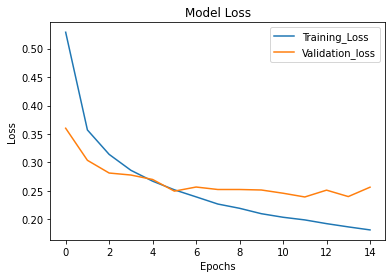

In [14]:
# plot training_loss vs validation_loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training_Loss', 'Validation_loss'])
plt.show()

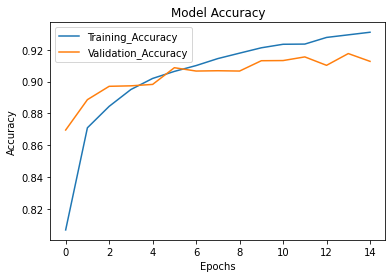

In [15]:
# plot training_accuracy vs validation_accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_Accuracy', 'Validation_Accuracy'])
plt.show()

In [18]:
# Model evaluation on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test_loss: ',test_loss)
print('test_accuracy: ',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.2565 - accuracy: 0.9127
test_loss:  0.25654420256614685
test_accuracy:  0.9126999974250793


4) Prediction

In [19]:
# Prediction
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# Function to load image for prediction
def load_image(img):
  img = load_img(img, grayscale = True, target_size=(28,28))
  img = img_to_array(img)
  img = img.reshape(1,28,28,1)
  img = img.astype('float32')
  img = img / 255.0
  return img

In [24]:
# Function to predict classes of that image
def make_prediction(img):
  img = load_image(img)
  result = model.predict_classes(img)
  print('The Predicted Classs is: ',result[0])

In [31]:
# Function to load the original image and its class
def load_original_image(img,label):
  pred = plt.imread(img)
  plt.imshow(pred)
  plt.show()
  print('The original Class is : '+label)

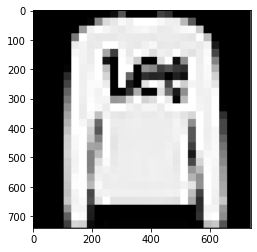

The original Class is : 2


In [32]:
load_original_image('sample_image.png','2')

In [33]:
make_prediction('sample_image.png')

The Predicted Classs is:  2


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


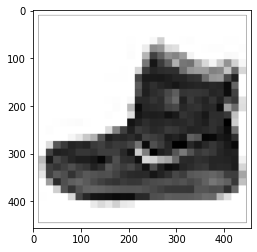

The original Class is : 9


In [35]:
load_original_image('sample_image2.png','9')

In [36]:
make_prediction('sample_image2.png')

The Predicted Classs is:  8


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


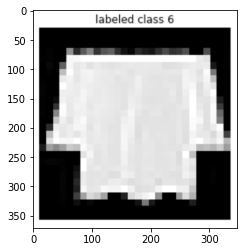

The original Class is : 6


In [37]:
load_original_image('sample_image3.png','6')

In [38]:
make_prediction('sample_image3.png')

The Predicted Classs is:  6


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
